<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Guided-Capstone-Step-3-Exploratory-Data-Analysis" data-toc-modified-id="Guided-Capstone-Step-3-Exploratory-Data-Analysis-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Guided Capstone Step 3 Exploratory Data Analysis</a></span></li><li><span><a href="#Build-data-profile-tables-and-plots" data-toc-modified-id="Build-data-profile-tables-and-plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Build data profile tables and plots</a></span><ul class="toc-item"><li><span><a href="#Anamolies-&amp;-outliers---review-boxplots" data-toc-modified-id="Anamolies-&amp;-outliers---review-boxplots-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anamolies &amp; outliers - review boxplots</a></span></li></ul></li><li><span><a href="#Explore-data-relationships" data-toc-modified-id="Explore-data-relationships-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore data relationships</a></span></li><li><span><a href="#Identification-and-creation-of-features" data-toc-modified-id="Identification-and-creation-of-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Identification and creation of features</a></span></li></ul></div>

# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [3]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [4]:
df = pd.read_csv('data/step2_output.csv')

# Delete the extra column 'Unnamed: 0'
del df['Unnamed: 0']

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

In [6]:
# Investigate and fix a data error in column 'yearsOpen'
suspect = df['yearsOpen']> 100
print(df['yearsOpen'][suspect])

df['yearsOpen'].replace(2019, 1, inplace=True)

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          330 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               330 non-null    float64
 16  TerrainParks       330 non

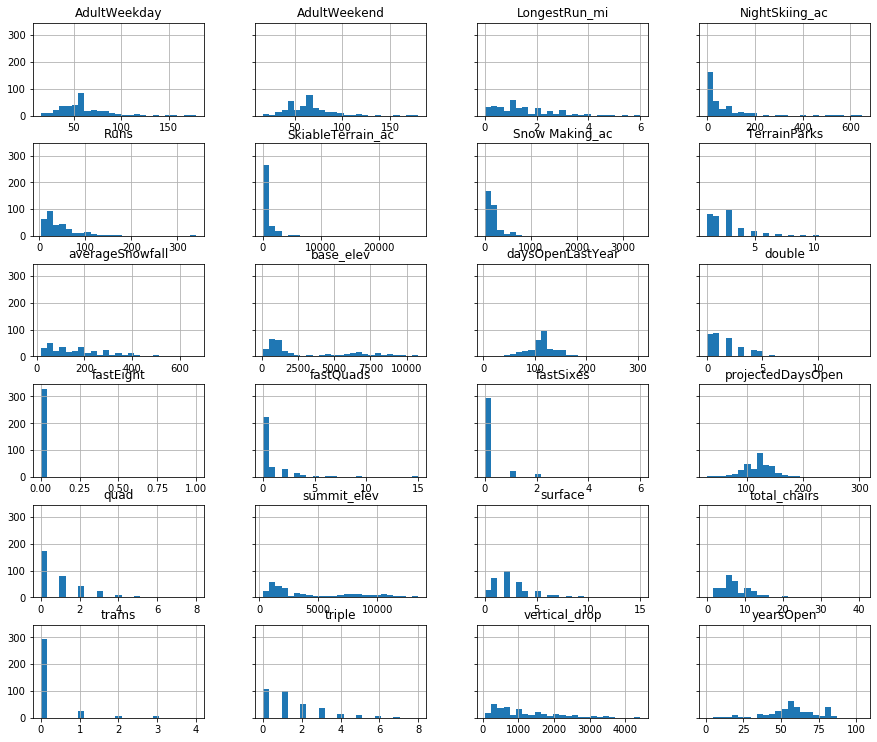

In [8]:
# Put numerical columns into a list
numerical = [
  'summit_elev', 'vertical_drop', 'base_elev', 'trams', 'fastEight', 'fastSixes', 'fastQuads',
    'quad', 'triple', 'double', 'surface', 'total_chairs', 'Runs','TerrainParks', 'LongestRun_mi',
'SkiableTerrain_ac','Snow Making_ac','daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
'AdultWeekend','projectedDaysOpen','NightSkiing_ac'
]

# Put categorical columns into a list
categorical = [
  'Name', 'Region', 'state'
]

# Plot the histogram of all numerical columns
df[numerical].hist(bins=25, figsize=(15, 15), layout=(7, 4), sharey=True);

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

The columns 'AdultWeekday' and 'AdultWeekend' seems correlated, it makes sense that price during the weekend will be a few dollars more than in the weekday.

The columns 'daysOpenLastYear' and 'projectedDayOpen' also seems related.

The columns 'FastEight', 'FastSixes', 'surface' and 'trams' have a large majority of values being 0. Only a few ski resort have such chairs.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

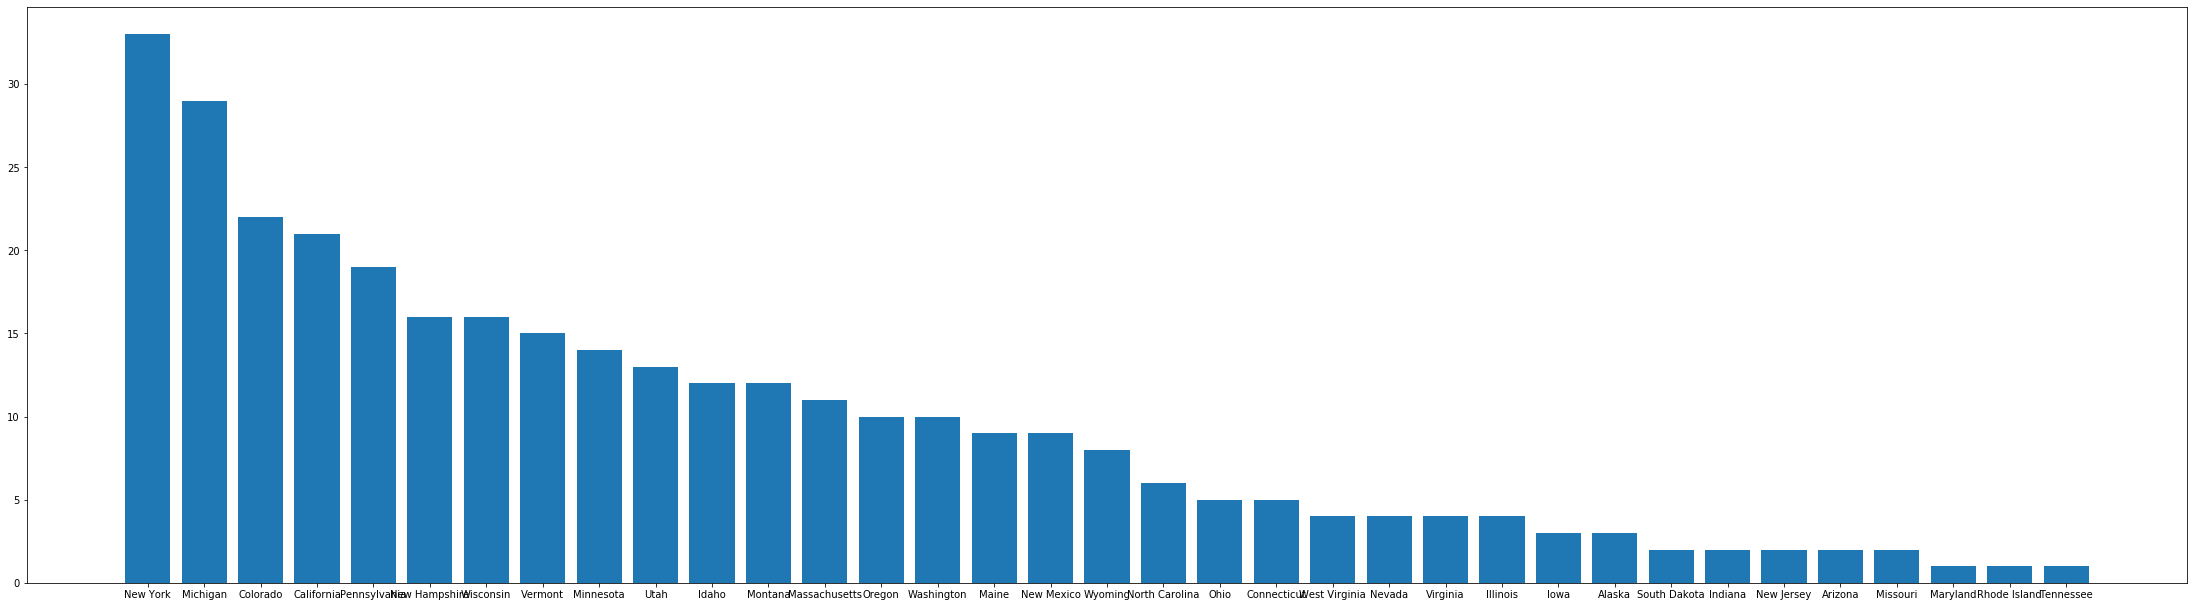

In [9]:
# Put the value in state in a list region_x and the count in a list region_y
state_viz = df['state'].value_counts()
state_x = state_viz.index
state_y = state_viz.values

fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(state_x,state_y)
plt.show()

**<font color='teal'>Region Levels Plot</font>**

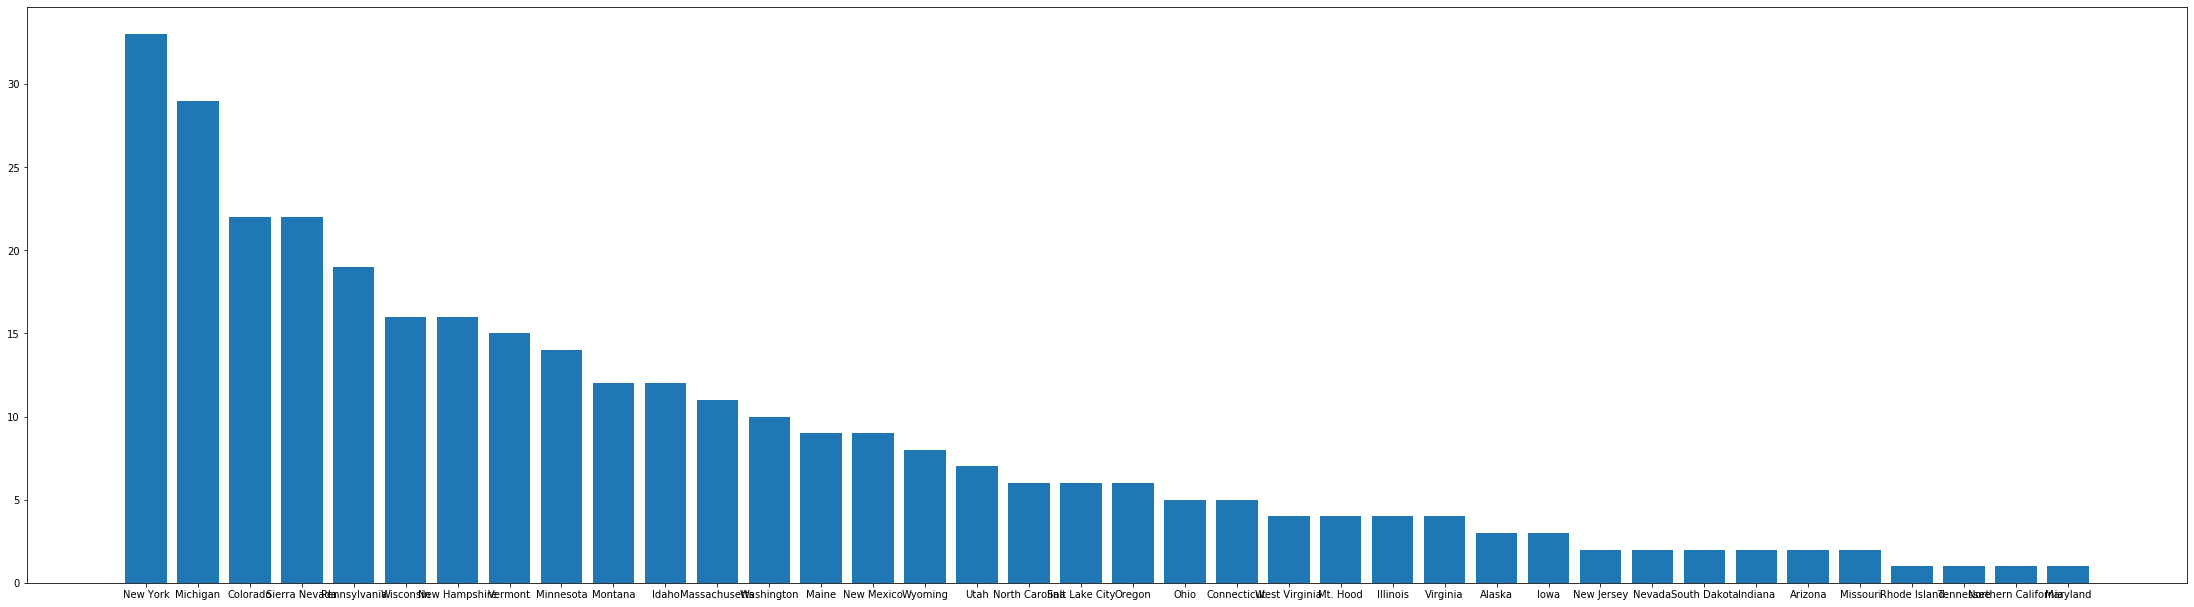

In [10]:
# Put the value in Region in a list region_x and the count in a list region_y
region_viz = df['Region'].value_counts()
region_x = region_viz.index
region_y = region_viz.values

fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
ax.bar(region_x,region_y)
plt.show()

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [11]:
# Drop the column Region from the data
df.drop("Region", axis=1, inplace=True)

## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

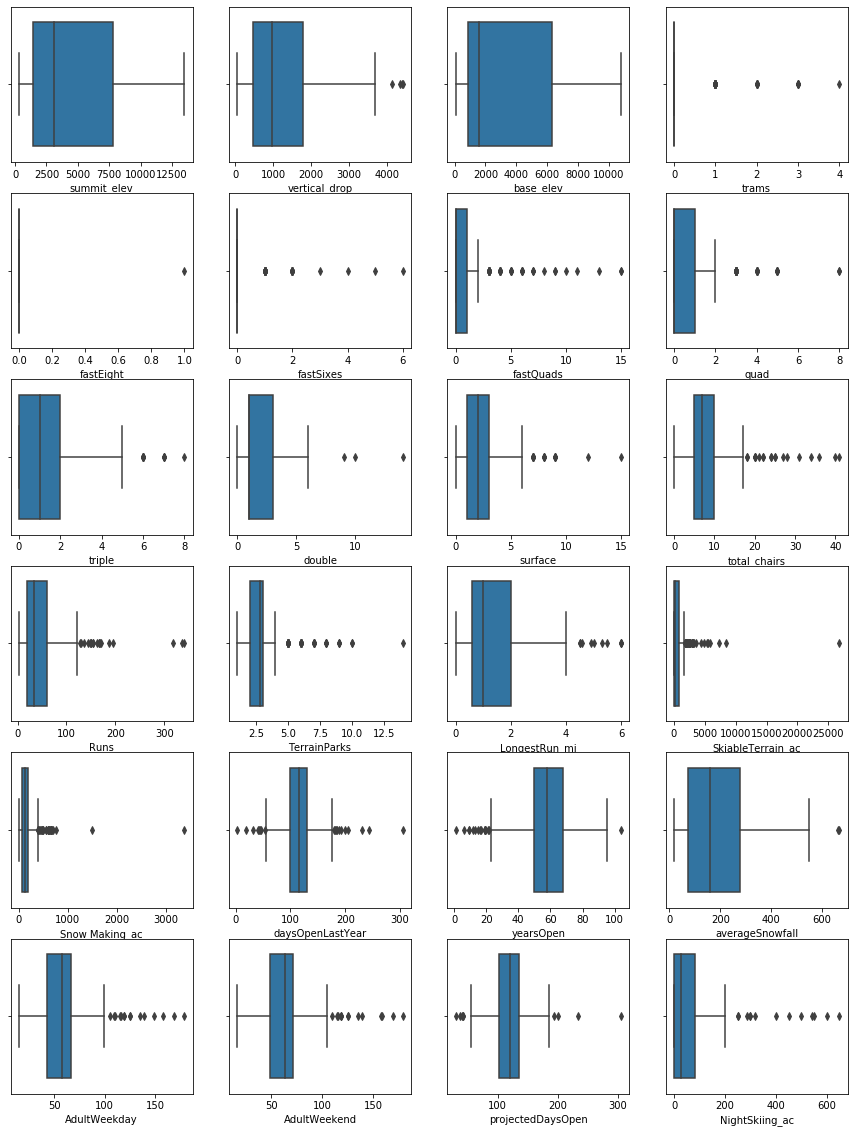

In [12]:
fig, ax = plt.subplots(6, 4, figsize=(15, 20))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=var, data=df, ax=subplot)

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [13]:
# Calculate the interquartile range for each numerical column
for var in numerical:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    
    # Filter outlier
    outliers = (df[var] < Q1 - 1.5 * IQR) | (df[var] > Q3 + 1.5 *IQR)
    # Print the number of outlier by columns
    print(var,' ',outliers.sum()) 

summit_elev   0
vertical_drop   4
base_elev   0
trams   37
fastEight   1
fastSixes   36
fastQuads   44
quad   38
triple   12
double   3
surface   18
total_chairs   20
Runs   19
TerrainParks   45
LongestRun_mi   10
SkiableTerrain_ac   39
Snow Making_ac   29
daysOpenLastYear   19
yearsOpen   20
averageSnowfall   2
AdultWeekday   15
AdultWeekend   14
projectedDaysOpen   9
NightSkiing_ac   13


In [14]:
df.shape

(330, 26)

In [36]:
# Create the list of responses variables
response_var = ['AdultWeekday', 'AdultWeekend', 'daysOpenLastYear','projectedDaysOpen']

# Create the list of features variables
feature_var = [
  'summit_elev', 'vertical_drop', 'base_elev', 'trams', 'fastEight', 'fastSixes', 'fastQuads',
    'quad', 'triple', 'double', 'surface', 'total_chairs', 'Runs','TerrainParks', 'LongestRun_mi',
'SkiableTerrain_ac','Snow Making_ac', 'yearsOpen', 'averageSnowfall','NightSkiing_ac'
]

######
# Isn't there a better way to create those list (by substracting from numerical for instance?
######

In [37]:
# Remove the outliers for columns 'AdultWeekday', 'AdultWeekend', 'daysOpenLastYear'
for var in response_var:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    
    # Filter outliers
    filter = (df[var] >= Q1 - 1.5 * IQR) & (df[var] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

# Check that the ouliers have been removed. 38 outliers were.
df.shape

(276, 26)

In [38]:
# Replace by the mean the outliers in other columns
for var in feature_var:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    
    # Filter outlier
    df[var].replace((df[var] < Q1 - 1.5 * IQR) | (df[var] > Q3 + 1.5 *IQR),df[var].mean(), inplace=True)

There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

In [17]:
from empiricaldist import Pmf

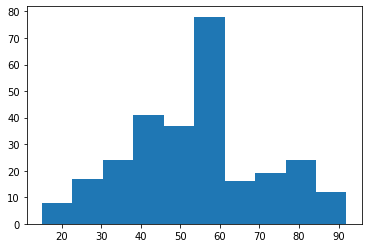

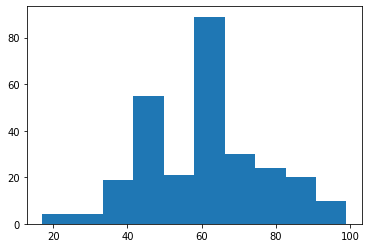

In [53]:
# Histograms are better to visualized unordered data
fig, ax = plt.subplots()
ax.hist(df.AdultWeekday)
plt.show()

fig, ax = plt.subplots()
ax.hist(df.AdultWeekend)
plt.show()

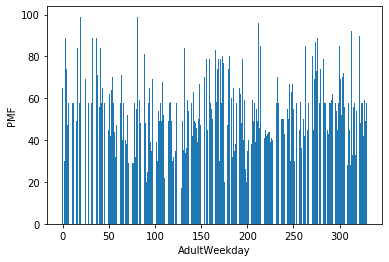

In [18]:
# Select the desired column
AdultWeekday = df['AdultWeekday']

# Make a PMF
pmf_AdultWeekday = Pmf(AdultWeekday)

# Plot the PMF
pmf_AdultWeekday.bar()

# Label the axes
plt.xlabel('AdultWeekday')
plt.ylabel('PMF')
plt.show()

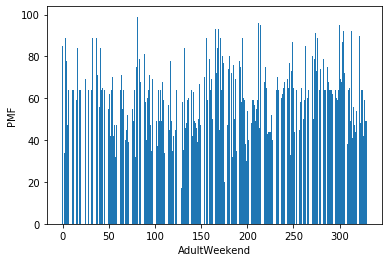

In [19]:
# Select the desired column
AdultWeekend = df['AdultWeekend']

# Make a PMF
pmf_AdultWeekend = Pmf(AdultWeekend)

# Plot the PMF
pmf_AdultWeekend.bar()

# Label the axes
plt.xlabel('AdultWeekend')
plt.ylabel('PMF')
plt.show()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

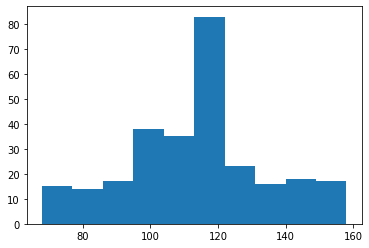

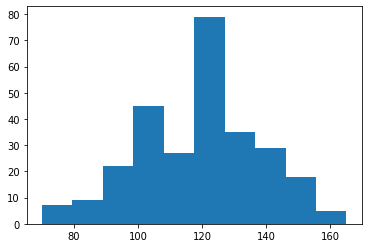

In [54]:
# Histograms are better to visualized unordered data
fig, ax = plt.subplots()
ax.hist(df.daysOpenLastYear)
plt.show()

fig, ax = plt.subplots()
ax.hist(df.projectedDaysOpen)
plt.show()

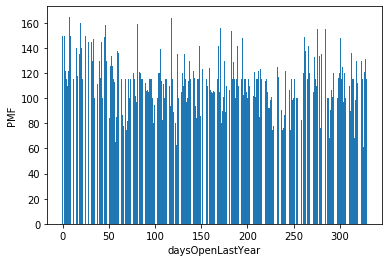

In [20]:
# Select the desired column
daysOpenLastYear = df['daysOpenLastYear']

# Make a PMF
pmf_daysOpenLastYear = Pmf(daysOpenLastYear)

# Plot the PMF
pmf_daysOpenLastYear.bar()

# Label the axes
plt.xlabel('daysOpenLastYear')
plt.ylabel('PMF')
plt.show()

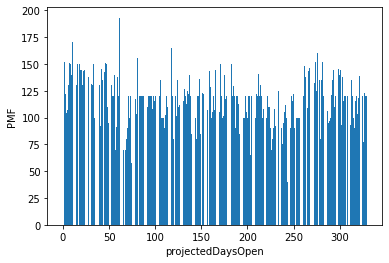

In [21]:
# Select the desired column
projectedDaysOpen = df['projectedDaysOpen']

# Make a PMF
pmf_projectedDaysOpen = Pmf(projectedDaysOpen)

# Plot the PMF
pmf_projectedDaysOpen.bar()

# Label the axes
plt.xlabel('projectedDaysOpen')
plt.ylabel('PMF')
plt.show()

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

AdultWeekday and AdultWeekend distributions are similar enough that just AdultWeekday can be kept as response variable.

ProjectedDaysOpen and daysOpenLastYear are distributions are similar enough that just daysOpenLastYear can be kept as response variable.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

In [23]:
#####
#This function is running forever, is something wrong in the way the df is formatted?
#####

#pair plots
g = sns.pairplot(df[numerical])

Error in callback <function flush_figures at 0x1a239a9170> (for post_execute):


KeyboardInterrupt: 

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

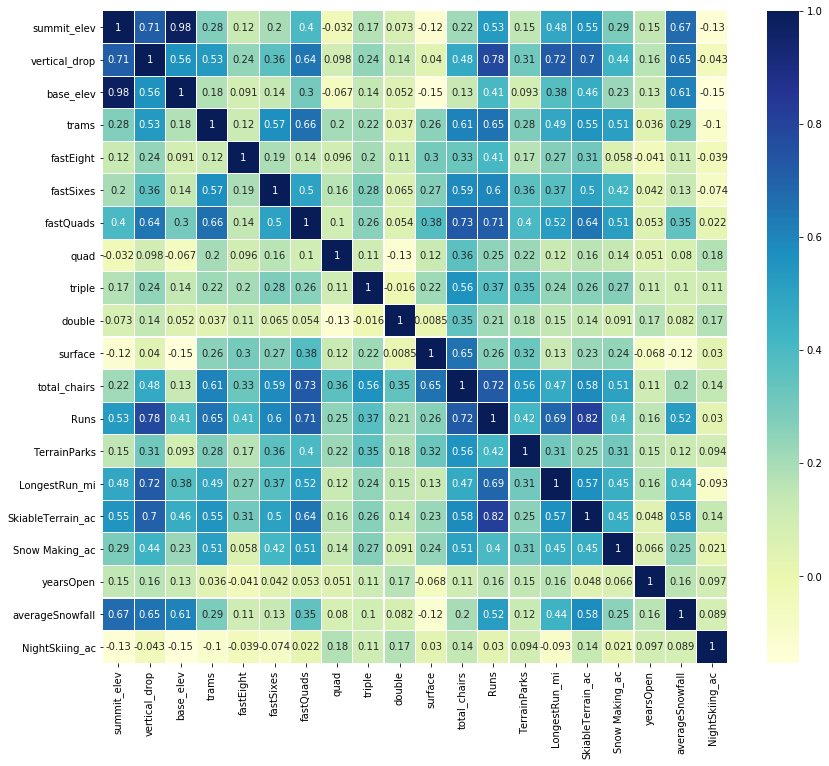

In [40]:
#create the correlation matrix heat map for the feature variables only
plt.figure(figsize=(14,12))
sns.heatmap(df[feature_var].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

summit_elev and base_elev are 98% correlated, summit_elev can be removed/
SkiableTerrain_ac and Runs are highly correlated.

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [41]:
# Drop column summit_elev
df.drop(columns='summit_elev', inplace=True)

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [42]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis =1).values

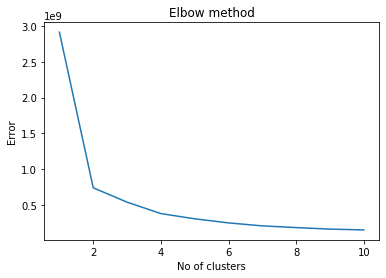

In [44]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

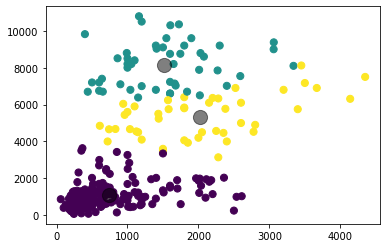

In [46]:
#fit the k-mean algo and plt the result
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Add centers to the visualization
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [48]:
df['kmean_cluster'] = pd.Series(y_kmeans, index=df.index)

In [51]:
df.to_csv('data/step3_output.csv', index=False)